# Data Cleaning

In [1]:
%matplotlib inline

import os
from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import urllib.request
import glob, os
import re
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
sno = nltk.stem.SnowballStemmer('english')
ps = nltk.stem.PorterStemmer()
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler
from nltk.corpus import stopwords

In [2]:
retval=os.chdir("..")

In [3]:
retval=os.chdir("input/clean_data/")
countries = glob.glob("*.txt")
countries = [w.replace('.txt', '') for w in countries]
countries.sort()
retval=os.chdir("../..")

In [4]:
stopwords = ['a', 'about', 'above', 'across', 'after', 'afterwards']
stopwords += ['again', 'against', 'all', 'almost', 'alone', 'along']
stopwords += ['already', 'also', 'although', 'always', 'am', 'among']
stopwords += ['amongst', 'amoungst', 'amount', 'an', 'and', 'another']
stopwords += ['any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere']
stopwords += ['are', 'around', 'as', 'at', 'back', 'be', 'became']
stopwords += ['because', 'become', 'becomes', 'becoming', 'been']
stopwords += ['before', 'beforehand', 'behind', 'being', 'below']
stopwords += ['beside', 'besides', 'between', 'beyond', 'bill', 'both']
stopwords += ['bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant']
stopwords += ['co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de']
stopwords += ['describe', 'detail', 'did', 'do', 'done', 'down', 'due']
stopwords += ['during', 'each', 'eg', 'eight', 'either', 'eleven', 'else']
stopwords += ['elsewhere', 'empty', 'enough', 'etc', 'even', 'ever']
stopwords += ['every', 'everyone', 'everything', 'everywhere', 'except']
stopwords += ['few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first']
stopwords += ['five', 'for', 'former', 'formerly', 'forty', 'found']
stopwords += ['four', 'from', 'front', 'full', 'further', 'get', 'give']
stopwords += ['go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her']
stopwords += ['here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers']
stopwords += ['herself', 'him', 'himself', 'his', 'how', 'however']
stopwords += ['hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed']
stopwords += ['interest', 'into', 'is', 'it', 'its', 'itself', 'keep']
stopwords += ['last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made']
stopwords += ['many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine']
stopwords += ['more', 'moreover', 'most', 'mostly', 'move', 'much']
stopwords += ['must', 'my', 'myself', 'name', 'namely', 'neither', 'never']
stopwords += ['nevertheless', 'next', 'nine', 'no', 'nobody', 'none']
stopwords += ['noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of']
stopwords += ['off', 'often', 'on','once', 'one', 'only', 'onto', 'or']
stopwords += ['other', 'others', 'otherwise', 'our', 'ours', 'ourselves']
stopwords += ['out', 'over', 'own', 'part', 'per', 'perhaps', 'please']
stopwords += ['put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed']
stopwords += ['seeming', 'seems', 'serious', 'several', 'she', 'should']
stopwords += ['show', 'side', 'since', 'sincere', 'six', 'sixty', 'so']
stopwords += ['some', 'somehow', 'someone', 'something', 'sometime']
stopwords += ['sometimes', 'somewhere', 'still', 'such', 'system', 'take']
stopwords += ['ten', 'than', 'that', 'the', 'their', 'them', 'themselves']
stopwords += ['then', 'thence', 'there', 'thereafter', 'thereby']
stopwords += ['therefore', 'therein', 'thereupon', 'these', 'they']
stopwords += ['thick', 'thin', 'third', 'this', 'those', 'though', 'three']
stopwords += ['three', 'through', 'throughout', 'thru', 'thus', 'to']
stopwords += ['together', 'too', 'top', 'toward', 'towards', 'twelve']
stopwords += ['twenty', 'two', 'un', 'under', 'until', 'up', 'upon']
stopwords += ['us', 'very', 'via', 'was', 'we', 'well', 'were', 'what']
stopwords += ['whatever', 'when', 'whence', 'whenever', 'where']
stopwords += ['whereafter', 'whereas', 'whereby', 'wherein', 'whereupon']
stopwords += ['wherever', 'whether', 'which', 'while', 'whither', 'who']
stopwords += ['whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with']
stopwords += ['within', 'without', 'would', 'yet', 'you', 'your']
stopwords += ['yours', 'yourself', 'yourselves']

In [5]:
stopwords += ['mr', 'non']

In [6]:
def removeStopwords(wordlist, stopwords):
    return [w for w in wordlist if w not in stopwords]
def wordListToFreqDict(wordlist):
    wordfreq = [wordlist.count(p) for p in wordlist]
    return dict(zip(wordlist,wordfreq))
def sortFreqDict(freqdict):
    aux = [(key, freqdict[key]) for key in freqdict]
    aux.sort()
    return aux

In [7]:
df = pd.DataFrame("", index=np.arange(0), columns=['word'])
print("NON-AVAILABLE COUNTRIES:")
for country in countries:
    with open('input/clean_data/{}.txt'.format(country), 'r') as myfile:
        speech=myfile.read().replace('\n', '')
    speech = speech.lower()
    speech = re.sub('[^a-z]', ' ', speech)
    wordlist = speech.split()
    wordlist = removeStopwords(wordlist=wordlist, stopwords = stopwords)
    
    table = sortFreqDict(wordListToFreqDict(wordlist=wordlist))
    
    if len(table) == 0:
        print(country)
        
    else:
        table = pd.DataFrame(np.array(table), columns = ['word', 'count'])
        table['count'] = pd.to_numeric(table['count'])
#        table['word_1'] = table['word'].apply(lambda x: lmtzr.lemmatize(x))
#        table['word_2'] = table['word'].apply(lambda x: ps.stem(x))
        table['word_3'] = table['word'].apply(lambda x: sno.stem(x))

        grouped = pd.DataFrame({'freq' : table.groupby(['word_3'])['count'].agg('sum')}).reset_index()
        grouped['freq'] = grouped['freq']/grouped['freq'].sum()
    
        df = pd.merge(df, grouped, how = 'outer', left_on='word', right_on='word_3')
        df['word'] = np.where(df['word'].isnull(), df['word_3'], df['word'])
        df[country] = df['freq']
        del df['word_3']
        del df['freq']

df = df.sort_values('word').reset_index(drop = True)

NON-AVAILABLE COUNTRIES:
Bahrain
Kenya
Lao_People’s_Democratic_Republic
Lebanon
Mongolia
Nicaragua
Palestine_(State_of)
Qatar
The_former_Yugoslav_Republic_of_Macedonia


In [8]:
df.describe(include = 'all')

,word,Afghanistan,Albania,Angola,Antigua_and_Barbuda,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,Uganda,Ukraine,United_Arab_Emirates,United_Kingdom_of_Great_Britain_and_Northern_Ireland,United_Republic_of_Tanzania,United_States_of_America,Uzbekistan,Viet_Nam,Zambia,Zimbabwe
count,9954,575.000000,564.000000,501.000000,600.000000,496.000000,439.000000,393.000000,481.000000,672.000000,...,248.000000,678.000000,551.000000,635.000000,667.000000,909.000000,535.000000,441.000000,536.000000,403.000000
unique,9954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,enticedinto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.001739,0.001773,0.001996,0.001667,0.002016,0.002278,0.002545,0.002079,0.001488,...,0.004032,0.001475,0.001815,0.001575,0.001499,0.001100,0.001869,0.002268,0.001866,0.002481
std,NaN,0.001655,0.001571,0.002404,0.001893,0.002139,0.002563,0.002119,0.003139,0.001833,...,0.002934,0.001917,0.002414,0.001742,0.001794,0.001817,0.001863,0.002453,0.002010,0.002493
min,NaN,0.001057,0.000996,0.001029,0.000907,0.001170,0.001224,0.001499,0.000996,0.000777,...,0.002747,0.000756,0.000830,0.000729,0.000885,0.000460,0.000966,0.001258,0.001018,0.001585
25%,NaN,0.001057,0.000996,0.001029,0.000907,0.001170,0.001224,0.001499,0.000996,0.000777,...,0.002747,0.000756,0.000830,0.000729,0.000885,0.000460,0.000966,0.001258,0.001018,0.001585
50%,NaN,0.001057,0.000996,0.001029,0.000907,0.001170,0.001224,0.001499,0.000996,0.000777,...,0.002747,0.000756,0.000830,0.000729,0.000885,0.000460,0.000966,0.001258,0.001018,0.001585
75%,NaN,0.002114,0.001992,0.002058,0.001813,0.002339,0.002448,0.002999,0.001992,0.001554,...,0.002747,0.001513,0.001660,0.001458,0.001770,0.000921,0.001932,0.002516,0.002037,0.001585


## Example of USA and France:

In [9]:
usa_france = df[['word', 'United_States_of_America', 'France']]
usa_france = usa_france[(usa_france['United_States_of_America'].isnull() == False) 
                        |(usa_france['France'].isnull() == False) 
                       ].reset_index(drop = True)

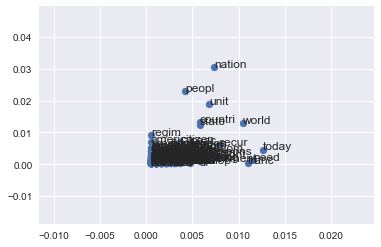

In [10]:
y=usa_france['United_States_of_America']
z=usa_france['France']
n=usa_france['word']

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i],y[i]))

## PCA on word count:

In [11]:
df1 = df.copy()
print(df1.shape)

(9954, 139)


___ Restrict to G20 countries:___

In [12]:
column_subset = ['word'
#                    , 'Afghanistan'
#                    , 'Albania'
#                    , 'Angola'
#                    , 'Antigua_and_Barbuda'
#                    , 'Armenia'
                    , 'Australia'
#                    , 'Austria'
#                    , 'Azerbaijan'
#                    , 'Bahamas'
#                    , 'Bahrain'
#                    , 'Bangladesh'
#                    , 'Barbados'
#                    , 'Belarus'
#                    , 'Belize'
#                    , 'Bhutan'
#                    , 'Bosnia_and_Herzegovina'
#                    , 'Botswana'
                    , 'Brazil'
#                    , 'Brunei_Darussalam'
#                    , 'Bulgaria'
#                    , 'Cabo_Verde'
#                    , 'Cambodia'
#                    , 'Cameroon'
#                    , 'Costa_Rica'
#                    , 'Croatia'
#                    , 'Cuba'
#                    , 'Cyprus'
#                    , 'Czech_Republic'
#                    , "Democratic_People's_Republic_of_Korea"
#                    , 'Denmark'
#                    , 'Dominica'
#                    , 'Dominican_Republic'
#                    , 'Egypt'
#                    , 'Eritrea'
#                    , 'Estonia'
#                    , 'Ethiopia'
                    , 'European_Union'
#                    , 'Fiji'
#                    , 'Finland'
                    , 'France'
#                    , 'Gambia_(Republic_of_The)'
#                    , 'Georgia'
                    , 'Germany'
#                    , 'Ghana'
#                    , 'Greece'
#                    , 'Grenada'
#                    , 'Guinea-Bissau'
#                    , 'Guyana'
#                    , 'Holy_See'
#                    , 'Hungary'
#                    , 'Iceland'
                    , 'India'
                    , 'Indonesia'
#                    , 'Iran_(Islamic_Republic_of)'
#                    , 'Ireland'
                    , 'Italy'
#                    , 'Jamaica'
                    , 'Japan'
#                    , 'Jordan'
#                    , 'Kazakhstan'
#                    , 'Kenya'
#                    , 'Kiribati'
#                    , 'Kuwait'
#                    , 'Lao_People’s_Democratic_Republic'
#                    , 'Latvia'
#                    , 'Lebanon'
#                    , 'Lesotho'
#                    , 'Liberia'
#                    , 'Liechtenstein'
#                    , 'Lithuania'
#                    , 'Malawi'
#                    , 'Malaysia'
#                    , 'Maldives'
#                    , 'Malta'
#                    , 'Marshall_Islands'
#                    , 'Mauritius'
#                    , 'Micronesia_(Federated_States_of)'
#                    , 'Mongolia'
#                    , 'Montenegro'
#                    , 'Mozambique'
#                    , 'Myanmar'
#                    , 'Namibia'
#                    , 'Nauru'
#                    , 'Nepal'
#                    , 'Netherlands'
#                    , 'New_Zealand'
#                    , 'Nicaragua'
#                    , 'Nigeria'
#                    , 'Norway'
#                    , 'Oman'
#                    , 'Pakistan'
#                    , 'Palau'
#                    , 'Palestine_(State_of)'
#                    , 'Papua_New_Guinea'
#                    , 'Paraguay'
#                    , 'Philippines'
#                    , 'Poland'
#                    , 'Portugal'
#                    , 'President_of_the_General_Assembly_(closing)'
#                    , 'President_of_the_General_Assembly_(opening)'
#                    , 'Qatar'
                    , 'Republic_of_Korea'
#                    , 'Republic_of_Moldova'
#                    , 'Romania'
                    , 'Russian_Federation'
#                    , 'Rwanda'
#                    , 'Saint_Kitts_and_Nevis'
#                    , 'Saint_Lucia'
#                    , 'Saint_Vincent_and_the_Grenadines'
#                    , 'Samoa'
#                    , 'San_Marino'
#                    , 'Sao_Tome_and_Principe'
#                    , 'Secretary-General_of_the_United_Nations'
#                    , 'Serbia'
#                    , 'Seychelles'
#                    , 'Sierra_Leone'
#                    , 'Singapore'
#                    , 'Slovakia'
#                    , 'Slovenia'
#                    , 'Solomon_Islands'
#                    , 'Somalia'
                    , 'South_Africa'
#                    , 'South_Sudan'
#                    , 'Spain'
#                    , 'Suriname'
#                    , 'Swaziland'
#                    , 'Sweden'
#                    , 'Switzerland'
#                    , 'Syrian_Arab_Republic'
#                    , 'Tajikistan'
#                    , 'Thailand'
#                    , 'The_former_Yugoslav_Republic_of_Macedonia'
#                    , 'Timor-Leste'
#                    , 'Tonga'
#                    , 'Trinidad_and_Tobago'
                    , 'Turkey'
#                    , 'Tuvalu'
#                    , 'Uganda'
#                    , 'Ukraine'
#                    , 'United_Arab_Emirates'
                    , 'United_Kingdom_of_Great_Britain_and_Northern_Ireland'
#                    , 'United_Republic_of_Tanzania'
                    , 'United_States_of_America'
#                    , 'Uzbekistan'
#                    , 'Viet_Nam'
#                    , 'Zambia'
#                    , 'Zimbabwe'
                   ]

In [23]:
df1 = df1[column_subset]

In [24]:
df1.shape

(9954, 16)

In [25]:
columns = list(df1)
country_columns = columns[1:]
for country in country_columns:
    df1[country] = df1[country].fillna(0)

___ Limit data to words refered to by at least 'n' countries:___

In [26]:
n = 0
df1['occurrence'] = df1.astype(bool).sum(axis=1)
df1 = df1[df1['occurrence']>n]
del df1['occurrence']
print(df1.shape)

(9954, 16)


___ PCA analysis:___

In [27]:
df2 = df1.transpose().copy()
df2.columns = df2.iloc[0].values.tolist()
df2 = df2.iloc[1:]
df2 = df2.reset_index()

In [28]:
df2

,level_0,aaa,aaainst,aainst,aall,aba,ababa,abacus,abandon,abat,...,zay,zeaiand,zealand,zero,zfirich,zhol,zimbabw,zionist,zo,zone
0,Australia,0,0,0,0,0,0,0,0.00122399,0,...,0,0,0,0,0,0,0,0,0,0
1,Brazil,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.00110619
2,European_Union,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.00368324
3,France,0,0,0,0,0,0,0,0.00052521,0,...,0,0,0,0,0,0,0,0,0,0.00052521
4,Germany,0,0,0,0,0,0,0,0.000893655,0,...,0,0,0,0,0,0,0,0,0,0
5,India,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000869565
6,Indonesia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Italy,0,0,0,0,0,0,0,0.000558036,0,...,0,0,0,0,0,0,0,0,0,0.00111607
8,Japan,0,0,0,0,0,0,0,0.00605327,0,...,0,0,0.00121065,0,0,0,0,0,0,0
9,Republic_of_Korea,0,0,0,0,0,0,0,0.000784929,0,...,0,0,0,0,0,0,0,0,0,0.000784929


In [29]:
X = df2.iloc[:,1:].values
y_ = df2.iloc[:, 0].values

In [30]:
X

array([[0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0011061946902654867],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.003683241252302026],
       ..., 
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [31]:
X_std = StandardScaler().fit_transform(X)

/Users/nj995/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [32]:
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

___Plot 2 axes:___

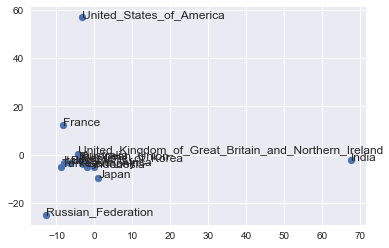

In [33]:
y=Y_sklearn[:,0]
z=Y_sklearn[:,1]
n=y_

fig, ax = plt.subplots()
ax.scatter(y, z)

for i, txt in enumerate(n):
    ax.annotate(txt, (y[i], z[i]))

___ Contributions:___

In [34]:
res = sklearn_pca.transform(np.eye(X.shape[1]))

In [35]:
res_2 = pd.DataFrame(res, columns = ['PCA1', 'PCA2'])

In [36]:
res_2['word'] = list(df2)[1:]

In [37]:
res_2.sort_values('PCA1')

,PCA1,PCA2,word
7140,-0.027875,0.012250,recent
7383,-0.023600,0.031737,respect
4471,-0.023255,-0.032010,intern
1687,-0.023205,-0.012949,concern
7749,-0.022334,-0.013422,secur
3366,-0.021603,0.013778,forc
1725,-0.021341,-0.002536,conflict
8537,-0.020512,-0.009239,syria
7404,-0.020055,-0.019638,result
1637,-0.019870,-0.016391,communiti


In [38]:
res_2.sort_values('PCA2')

,PCA1,PCA2,word
4471,-0.023255,-0.032010,intern
2688,0.007420,-0.028702,effort
4699,-0.017186,-0.027039,joint
7113,0.001603,-0.026106,realiti
7375,-0.009743,-0.025557,resolut
94,-0.013691,-0.025548,activ
7115,-0.012735,-0.024611,realize
6901,0.023016,-0.024307,propos
4307,-0.010122,-0.024158,indivis
1047,-0.013118,-0.024118,block


In [43]:
df2[['level_0', 'worldmust']]

,level_0,worldmust
0,Australia,0
1,Brazil,0
2,European_Union,0
3,France,0
4,Germany,0
5,India,0.000869565
6,Indonesia,0
7,Italy,0
8,Japan,0
9,Republic_of_Korea,0


In [41]:
df2

,level_0,aaa,aaainst,aainst,aall,aba,ababa,abacus,abandon,abat,...,zay,zeaiand,zealand,zero,zfirich,zhol,zimbabw,zionist,zo,zone
0,Australia,0,0,0,0,0,0,0,0.00122399,0,...,0,0,0,0,0,0,0,0,0,0
1,Brazil,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.00110619
2,European_Union,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.00368324
3,France,0,0,0,0,0,0,0,0.00052521,0,...,0,0,0,0,0,0,0,0,0,0.00052521
4,Germany,0,0,0,0,0,0,0,0.000893655,0,...,0,0,0,0,0,0,0,0,0,0
5,India,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000869565
6,Indonesia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Italy,0,0,0,0,0,0,0,0.000558036,0,...,0,0,0,0,0,0,0,0,0,0.00111607
8,Japan,0,0,0,0,0,0,0,0.00605327,0,...,0,0,0.00121065,0,0,0,0,0,0,0
9,Republic_of_Korea,0,0,0,0,0,0,0,0.000784929,0,...,0,0,0,0,0,0,0,0,0,0.000784929
